In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()

In [2]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
digits.data.shape

(1797, 64)

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0) ## Model and cluster creation

In [5]:
clusters = kmeans.fit_predict(digits.data)

## Out of all the 1797 digits, the numbers are classified based on their respective values to their clusters 

In [6]:
clusters

## Returns the index of the values.

array([5, 7, 7, ..., 7, 3, 3])

In [7]:
clusters.shape

(1797,)

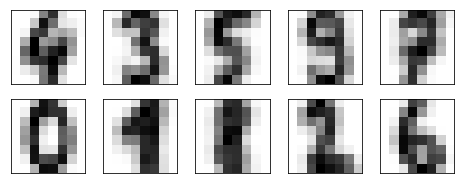

In [8]:
ig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

* The data above is ordered by cluster number

In [9]:
from scipy.stats import mode
import numpy as np

In [11]:
## Labelling the clusters to organize them

labels = np.zeros_like(clusters)
# Creates a zero array data of length of cluster size

In [12]:
clusters

array([5, 7, 7, ..., 7, 3, 3])

In [13]:
clusters.view

<function ndarray.view>

In [14]:
clusters.view()

array([5, 7, 7, ..., 7, 3, 3])

In [15]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
labels.shape

(1797,)

In [17]:
mask = (clusters == 0)

In [18]:
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [19]:
digits.target[mask]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [20]:
digits.target[mask][0]

4

In [21]:
digits.target[mask][1]

4

In [22]:
digits.target[mask][25]

4

In [23]:
labels[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [24]:
for i in range(10):
    mask = (clusters == i)
    # First time : All the zeros are marked True
    # Second time : All the ones are marked True
    labels[mask] = mode(digits.target[mask])[0]

In [25]:
labels

array([0, 8, 8, ..., 8, 9, 9])

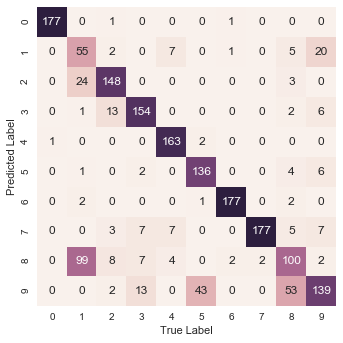

In [26]:
# Accuracy Measurement

from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=digits.target_names, yticklabels=digits.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label')